### NLTK Corpus

In [2]:
import nltk
nltk.download(['inaugural', 'brown'])

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\samsu\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\samsu\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
brown = nltk.corpus.brown

In [4]:
# genre별로 modal의 빈도수를 가진 cfd
cfd1 = nltk.ConditionalFreqDist(
    (genere, word)
    for genere in brown.categories()
    for word in brown.words(categories=genere)
)

generes = brown.categories()[::5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions=generes, samples=modals)

            can could  will would   may might 
adventure    46   151    50   191     5    58 
  hobbies   268    58   264    78   131    22 
     news    93    86   389   244    66    38 


In [5]:
# 이렇게도 나타낼 수 있다.
cfd2 = nltk.ConditionalFreqDist(
    (genere, word)
    for genere in brown.categories()
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genere)
        if word.lower() == modals
)

cfd2.tabulate()

                  Can Could   May Might  Will Would   can could   may might  will would 
      adventure     2     3     2     1     1     3    46   151     5    58    50   191 
 belles_lettres     3     3    14     0    10     5   246   213   207   113   236   392 
      editorial     3     1     5     0     2     5   121    56    74    39   233   180 
        fiction     2     2     2     0     4     4    37   166     8    44    52   287 
     government     2     0    26     0     0     0   117    38   153    13   244   120 
        hobbies     8     1    12     0     5     5   268    58   131    22   264    78 
          humor     1     3     0     0     0     0    16    30     8     8    13    56 
        learned     2     0    12     0     0     2   365   159   324   128   340   319 
           lore     0     1     5     1     3     2   170   141   165    49   175   186 
        mystery     3     4     2     0     5     3    42   141    13    57    20   186 
           news     1

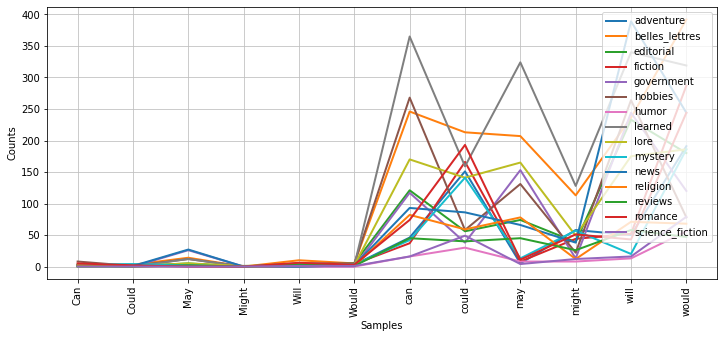

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
import matplotlib.pyplot as plt #plt라는 이름으로 가져오겠다.
plt.figure(figsize=(12,5))
cfd2.plot()

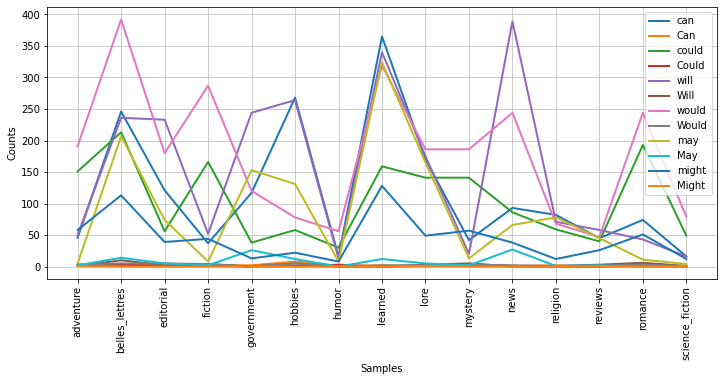

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
cfd3 = nltk.ConditionalFreqDist(
    (word, genere)
    for genere in brown.categories()
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genere)
        if word.lower() == modals
)

cfd3.plot()

#### inaugural(연설문 데이터)

In [ ]:
inaugural = nltk.corpus.inaugural
inaugural.fileids() # 연도 - 이름.txt

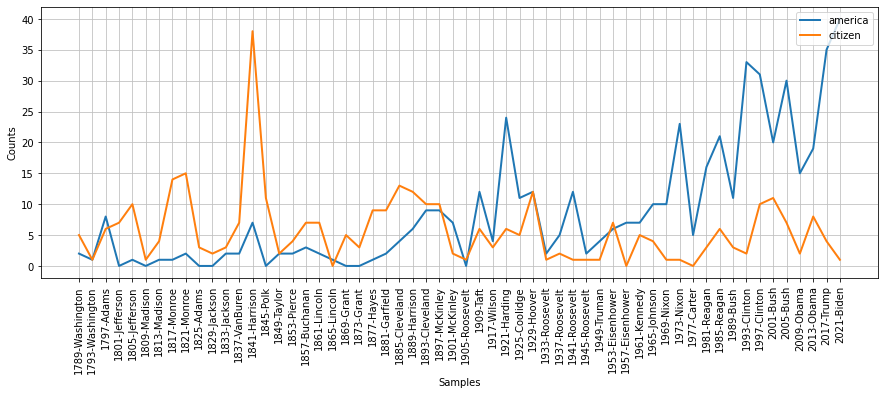

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
# inaugural에서 america, citizen의 빈도수, 연도별로
inaugural = nltk.corpus.inaugural

cfd4 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4]) # 축 지정
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid) # 콜론을 사용하지 않음!
        if word.lower().startswith(target_word)
)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
cfd4.plot()

In [22]:
inaugural = nltk.corpus.inaugural

cfd5 = nltk.ConditionalFreqDist(
    (fileid[:-4], target_word)
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid)
        if word.lower().startswith(target_word)
)

cfd5.tabulate()

                america citizen 
1789-Washington       2       5 
1793-Washington       1       1 
     1797-Adams       8       6 
 1801-Jefferson       0       7 
 1805-Jefferson       1      10 
   1809-Madison       0       1 
   1813-Madison       1       4 
    1817-Monroe       1      14 
    1821-Monroe       2      15 
     1825-Adams       0       3 
   1829-Jackson       0       2 
   1833-Jackson       2       3 
  1837-VanBuren       2       7 
  1841-Harrison       7      38 
      1845-Polk       0      11 
    1849-Taylor       2       2 
    1853-Pierce       2       4 
  1857-Buchanan       3       7 
   1861-Lincoln       2       7 
   1865-Lincoln       1       0 
     1869-Grant       0       5 
     1873-Grant       0       3 
     1877-Hayes       1       9 
  1881-Garfield       2       9 
 1885-Cleveland       4      13 
  1889-Harrison       6      12 
 1893-Cleveland       9      10 
  1897-McKinley       9      10 
  1901-McKinley       7       2 
 1905-Roos

### Tuple & List

1. 생성하기

In [24]:
# 빈 튜플
empty_Tuple1 = []
empty_Tuple2 = tuple()

# 빈 리스트
empty_List1 = []
empty_List2 = list()

empty_Tuple1, empty_Tuple2, empty_List1, empty_List2

([], (), [], [])

1.1. 요소가 2개 이상일 때

In [6]:
listA = ['a', 'b']

tupleA = 'a', 'b' # 괄호 없이 더 많이 사용
tupleA = ('a', 'b')

tupleA, listA

(('a', 'b'), ['a', 'b'])

1.2. 요소가 1개일 때

In [7]:
listA = ['a']

tupleA = ('a',) # comma 필수
tupleA = 'a',

tupleA, listA

(('a',), ['a'])

In [ ]:
ex = ('a') # comma가 없을 때는 어떠한가?
type(ex), type(tupleA)

2. 여러 변수 할당하기
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜플 자체가 a = [1,2,3,4]
- unpacking: 여러 변수에 하나의 데이터를 할당하는 것, 그것을 각각의 변수르 변환하는 것.
    - a, b, c = [1, 2, 3]

In [8]:
name = 'lee'
a, b, c = name
a, b, c # unpacking

('l', 'e', 'e')

In [9]:
# 변수의 수는 일대일대응이 이루어져야 한다.
laptop = 'zenbook'
l1, l2, l3 = laptop
l1, l2, l3 # 변수의 수가 부족할 경우 에러 발생

ValueError: too many values to unpack (expected 3)

In [ ]:
# 값 교환
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd'

temp1 = pwd
temp2 = userId
pwd = temp2
userId = temp1

# 튜플을 쓰면?

pwd, userId = userId, pwd
pwd, userId

3. 연산
- 리스트와 동일함

In [25]:
# 덧셈
('a',) + ('b', 'c')

('a', 'b', 'c')

In [26]:
# 곱셈
('a', 'b') * 3

('a', 'b', 'a', 'b', 'a', 'b')

In [14]:
a = 1, 2
b = 1, 3

a > b, a, b

(False, (1, 2), (1, 3))

4. 순회하기 

In [28]:
a = 1, 2, 3, 4, 5
for i in a:
    print(a)

(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)


5. List Comprehension
    - Tuple? (X)

In [29]:
#그래도 쓰고싶다면...
#1. 튜플로 감싸기
tuple([word for word in a])

#2 효율성이 매우 낮음
*[word for word in a],

(1, 2, 3, 4, 5)

6. 튜플은 불변 객체이다.
    - 즉, 추가로 첨가할 수 없다.
    - 코드를 수정할 때 튜플을 수정할 수 없게 만드는 용도로 사용한다.
        - ex. key값 저장
    - 메모리의 사용이 적다

In [16]:
a = (1, )
b = (1, 2, 3)

#더하면 다른 객체가 만들어진다. 튜플은 수정이 불가능하다는 점을 명심하자.
id(a), id(a + b)

(1626598392592, 1626627083696)

7. 형 변환
- tuple()
- ()

In [32]:
tuple('cat'), ['cat']

(('c', 'a', 't'), ['cat'])

In [17]:
list('cat'), ['cat'] #사용하면 안된다.

(['c', 'a', 't'], ['cat'])

In [33]:
# 슬라이싱 (튜플도 인덱스를 사용할 수 있다.)
c = [1, 2, 3]
c[0]

1

- 튜플의 장점:
    - '타인이 변경하는 것을 막을 수 있다.'
    - 메모리의 사용이 적다.
- 리스트 장점:
    - 데이터를 순차적으로 파악하기 좋다.
    - 중복되는 데이터를 포함할 수 있다.

### List 관련 함수

1. 항목 변경하기

In [131]:
days = ['월', '화', '수', '목']

# fri 추가하기, 추가시 반환은 안됨...
days.append('금')

In [132]:
days

['월', '화', '수', '목', '금']

In [133]:
days.insert(2, 'sat')

In [134]:
days

['월', '화', 'sat', '수', '목', '금']

In [135]:
# 병합하기 - 요소를 추가
listA = ['토','일']
days.extend(listA)
print(days)

['월', '화', 'sat', '수', '목', '금', '토', '일']


In [136]:
# 병합하기 - 리스트 자체 추가
listA = ['토', '일']
days.append(listA) 
days

['월', '화', 'sat', '수', '목', '금', '토', '일', ['토', '일']]

In [137]:
# 병합하기 - 리스트 안의 요소 추가(extend와 동일하게 사용됨.)
days += listA
days

['월', '화', 'sat', '수', '목', '금', '토', '일', ['토', '일'], '토', '일']

In [141]:
# offset을 이용한 방법
days = ['월','화','수','금','금']
days[3] = '목'
print(days)

['월', '화', '수', '목', '금']


In [145]:
# 슬라이싱도 가능
days[:3] = '토','일' 
print(days)

['토', '일']


In [144]:
days[:3] = 'cat'
print(days) # str형을 다룰 때에는 하나하나씩 쪼개져서 들어가는 것에 유의하자.

['c', 'a', 't']


2. 삭제하기

2.1. 보통의 삭제

In [44]:
del days[0] # 자리가 보존되지 않고 아이템이 하나씩 앞당겨짐
days

['화', 'sat', 'sat', '수', '목', '금', '토', '토']

2.2. 특정한 값 삭제
- 이때 0번째만 삭제

In [45]:
days.remove('토')
days

['화', 'sat', 'sat', '수', '목', '금', '토']

2.3. 맨 마지막 요소 삭제


In [46]:
#3. pop(index) default = -1, 맨 마지막 요소를 삭제
days.pop(0)

['sat', 'sat', '수', '목', '금', '토']

In [ ]:
days

2.4. 전체 삭제

In [48]:
# 리스트 내 요소를 전부 삭제하고 빈 리스트로 만들고 싶을 때 사용
days.clear()

[]

In [ ]:
days

3. 값 찾기

In [49]:
a = list(range(5)) # a = [0, 1, 2, 3, 4]가 될 것이다.
a.index(1) # 1이 나올 것이다.

2

4. 값 확인

In [50]:
# 3이 리스트 안에 있는지 확인하기
3 in a

True

5. 정렬하기
- `sort()`: 정렬한 뒤 반환하지 않고, 기존 값 변병됨
- `sorted()`: 정렬된 복사본을 반환. 기존 값은 유지
-  `리스트.reverse()`
-  `list(reversed(리스트))`

In [55]:
a = list(range(5))
b = sorted(a, reverse=True)
a, b

([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

In [59]:
b.sort()
b

[0, 1, 2, 3, 4]

In [60]:
b.reverse()
b

[4, 3, 2, 1, 0]

In [61]:
c = list(reversed(b))
c

[0, 1, 2, 3, 4]

6. 할당하기
- `=`으로 할당할 때에는 하나가 변할 때 같이 변환됨. 메모리 주소를 참고하고 있다는 점에서 그럼
- shallow copy
    - a가 변해도 b가 변하지 않게 하는 복사
    - 리스트.copy
    - list(리스트)
    - list[:]
- deep copy
    - 하위에 중첩된 리스트 요소가 바뀌는 것을 방지

In [24]:
a = [0, 1, 2, 3, 4]

In [25]:
b = a # [0, 1, 2, 3, 4]에 a, b가 메모리 주소를 참조하므로...
b[0] = 7 # b의 첫 번째 요소를 7로 바꿨음에도 불구하고
a, b # a의 첫 번째 요소도 7로 바뀐 것을 확인할 수 있다.

([7, 1, 2, 3, 4], [7, 1, 2, 3, 4])

In [26]:
id(a), id(b) # 따라서 주소값도 동일하다.

(1626626987712, 1626626987712)

In [66]:
# shallow copy
b = a.copy()
c = list(a)
d = a[:]

id(a), id(b), id(c), id(d)


(2010910267776, 2010910187200, 2010910514624, 2010910563200)

In [67]:
# deep
a.append([6, 7, 8])
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [68]:
e = a.copy()
e

[7, 1, 2, 3, 4, [6, 7, 8]]

In [69]:
a[-1][0] = 0
a, e

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [70]:
import copy
f = copy.deepcopy(a)
f

[7, 1, 2, 3, 4, [0, 7, 8]]

In [71]:
f[-1][-1] = 9
a, f # a와 f가 달라짐

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

#### 순회하기
- `zip()`: 여러 개 리스트 동시 순회
- `enumerate()`: 인덱스도 함께 돌고자 할 때 (list, range)
- `range()`

In [72]:
a = [1, 2, 3]
b = ['mon', 'tue', 'wed', 'thu']

for itemA, itemB in zip(a, b): #아이템 수가 적은 시퀀스에서 완료됨
    print((itemA, itemB))

(1, 'mon')
(2, 'tue')
(3, 'wed')


In [73]:
list(zip(a, b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [74]:
dict(zip(a, b)) #딕셔너리형으로

{1: 'mon', 2: 'tue', 3: 'wed'}

In [76]:
for idx, itemA in enumerate(b):
    print((idx, itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


#### List Comprehension에서의 활용

In [78]:
ex = [(nal, day) for nal, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

### 연습

- 리스트 → for 문으로
- for문을 사용하여 ex를 구현하기

In [81]:
result =[]

for nal, day in zip(a, b):
    result.append((nal, day))

result

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [ ]:
# for day in b
    # for nal in a 를 다르게 표현하는 법
[(nal, day) for nal in a for day in b]

In [85]:
# 문제 1
sentence = "don't judge a book by its cover"
# [(대문자, 타이틀, 글자수),]로 저장된 리스트 만들기
[(word.upper(), word.title(), len(word)) for word in sentence.split()]


[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [102]:
# 문제 2
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]

In [103]:
# 2.1. 문장으로 구성된 리스트로 만들기.
[' '.join(sent) for sent in text]

['hello guys', 'how are you']

In [104]:
# 2.2. 전체 단어를 하나의 리스트로 가져오기
[word for word in text for word in word]

['hello', 'guys', 'how', 'are', 'you']

In [106]:
# 2.3. 전체를 스트링으로 가져오기 
' '.join([word for word in text for word in word])

'hello guys how are you'